In [28]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [17]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [18]:
train_data = train_data - train_data.mean(axis=0)
test_data = test_data - test_data.mean(axis=0)

train_data = train_data / np.std(train_data, axis=0)
test_data = test_data / np.std(test_data, axis=0)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

282 282
122 122


In [19]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=train_data.shape[1], name='dense_input'))
model.add(layers.Dense(64, activation='relu', name='dense'))
model.add(layers.Dense(64, activation='relu', name='dense_1'))
model.add(layers.Dense(1, activation='relu', name='dense_2'))
model.summary()

model.compile(loss='mse', metrics=['mae'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)


In [30]:
history = model.fit(train_data,train_labels,
                epochs=1000,
                batch_size=400,
                callbacks=[early_stopping],
                validation_data=(x_val, y_val))

Epoch 1/1000
2/2 [==============================] - 0s 21ms/step - loss: 6.5707 - mae: 1.7766 - val_loss: 5.2928 - val_mae: 1.6964
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 6.6669 - mae: 1.7411 - val_loss: 5.8787 - val_mae: 1.8097
Epoch 3/1000
2/2 [==============================] - 0s 24ms/step - loss: 7.3830 - mae: 1.8106 - val_loss: 5.7083 - val_mae: 1.7933
Epoch 4/1000
2/2 [==============================] - 0s 22ms/step - loss: 7.1940 - mae: 1.7837 - val_loss: 5.5283 - val_mae: 1.7860
Epoch 5/1000
2/2 [==============================] - 0s 20ms/step - loss: 7.0119 - mae: 1.7520 - val_loss: 5.8867 - val_mae: 1.7862
Epoch 6/1000
2/2 [==============================] - 0s 20ms/step - loss: 7.3135 - mae: 1.8793 - val_loss: 5.7137 - val_mae: 1.8104


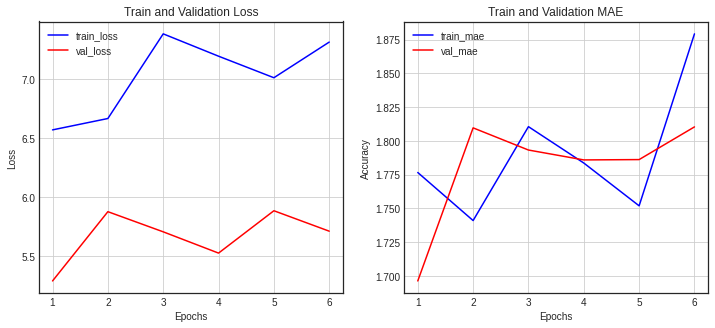

In [31]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [32]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 17.0678 - mae: 2.6119


[17.067779541015625, 2.6119489669799805]